# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
        
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | tehuixtla
Processing Record 2 of Set 13 | longyearbyen
Processing Record 3 of Set 13 | ta`u
Processing Record 4 of Set 13 | hamilton
Processing Record 5 of Set 13 | lukolela
Processing Record 6 of Set 13 | kayangel
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | kaitong
Processing Record 9 of Set 13 | port-aux-francais
Processing Record 10 of Set 13 | dhidhdhoo
Processing Record 11 of Set 13 | san patricio
Processing Record 12 of Set 13 | albany
Processing Record 13 of Set 13 | kone
Processing Record 14 of Set 13 | papatowai
Processing Record 15 of Set 13 | queenstown
Processing Record 16 of Set 13 | mana
Processing Record 17 of Set 13 | governor's harbour
City not found. Skipping...
Processing Record 18 of Set 13 | orapa
Processing Record 19 of Set 13 | bikenibeu village
Processing Record 20 of Set 13 | camacupa
Processing Record 21 of Set 13 | rongelap
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tehuixtla,18.5500,-99.2667,76.26,77,5,2.21,MX,2023-10-31 02:29:35
1,longyearbyen,78.2186,15.6401,33.64,75,75,12.66,SJ,2023-10-31 02:24:48
2,ta`u,-14.2336,-169.5144,80.47,79,34,24.56,AS,2023-10-31 02:29:35
3,hamilton,39.1834,-84.5333,39.97,84,40,3.44,US,2023-10-31 02:27:45
4,lukolela,-1.0605,17.1821,71.01,98,100,2.33,CD,2023-10-31 02:29:35


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tehuixtla,18.5500,-99.2667,76.26,77,5,2.21,MX,2023-10-31 02:29:35
1,longyearbyen,78.2186,15.6401,33.64,75,75,12.66,SJ,2023-10-31 02:24:48
2,ta`u,-14.2336,-169.5144,80.47,79,34,24.56,AS,2023-10-31 02:29:35
3,hamilton,39.1834,-84.5333,39.97,84,40,3.44,US,2023-10-31 02:27:45
4,lukolela,-1.0605,17.1821,71.01,98,100,2.33,CD,2023-10-31 02:29:35


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

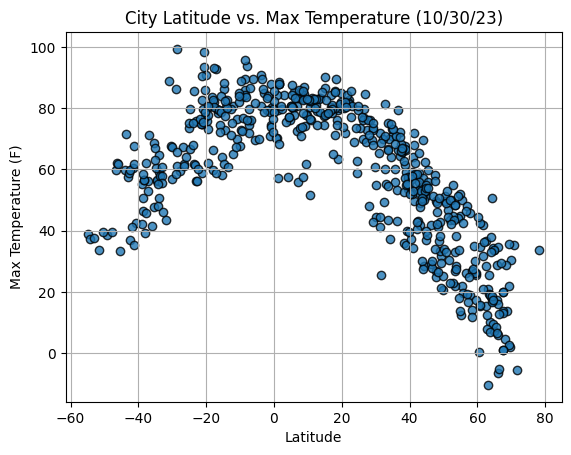

In [15]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

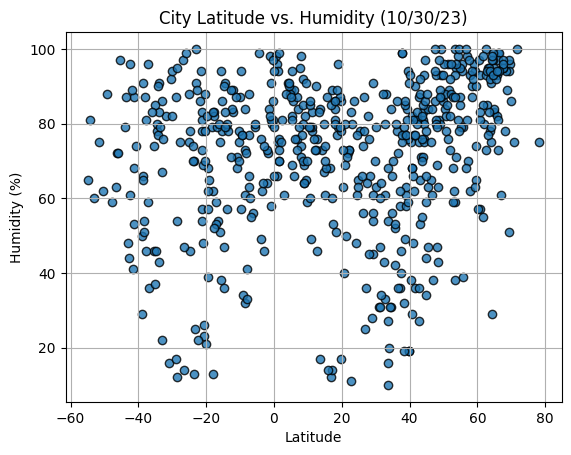

In [16]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

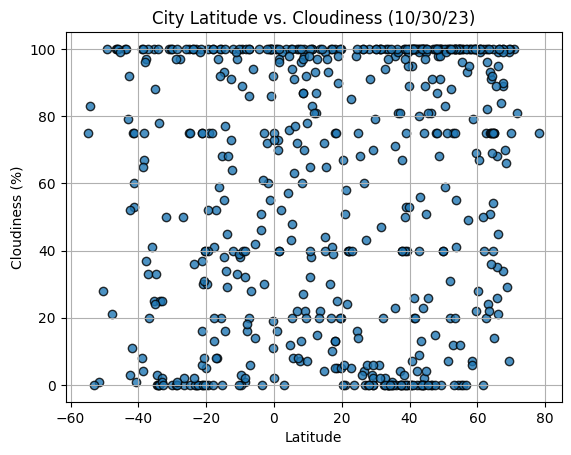

In [17]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

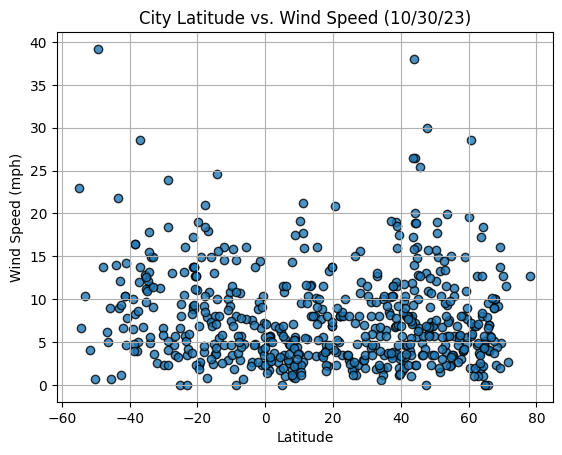

In [18]:
# Build the scatter plots for latitude vs. wind speed plot
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
     # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tehuixtla,18.5500,-99.2667,76.26,77,5,2.21,MX,2023-10-31 02:29:35
1,longyearbyen,78.2186,15.6401,33.64,75,75,12.66,SJ,2023-10-31 02:24:48
3,hamilton,39.1834,-84.5333,39.97,84,40,3.44,US,2023-10-31 02:27:45
5,kayangel,8.0823,134.7173,83.80,74,13,7.07,PW,2023-10-31 02:29:35
7,kaitong,44.8135,123.1500,51.35,34,100,14.81,CN,2023-10-31 02:29:35


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ta`u,-14.2336,-169.5144,80.47,79,34,24.56,AS,2023-10-31 02:29:35
4,lukolela,-1.0605,17.1821,71.01,98,100,2.33,CD,2023-10-31 02:29:35
6,ushuaia,-54.8000,-68.3000,38.86,65,75,23.02,AR,2023-10-31 02:26:25
8,port-aux-francais,-49.3500,70.2167,38.70,88,100,39.19,TF,2023-10-31 02:24:41
12,kone,-21.0595,164.8658,79.79,48,30,8.86,NC,2023-10-31 02:26:55


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7555750531421808


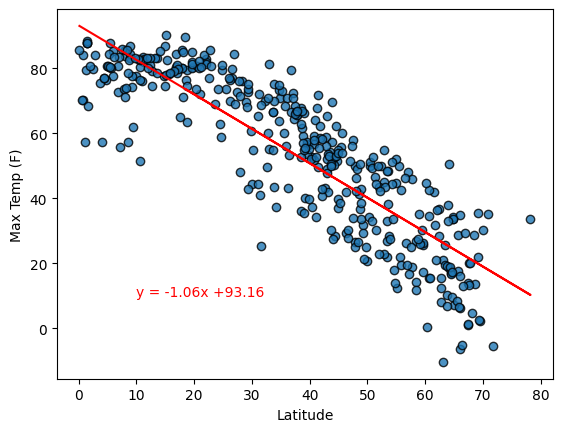

In [50]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))
plt.show()

The r-squared is: 0.5450757429219355


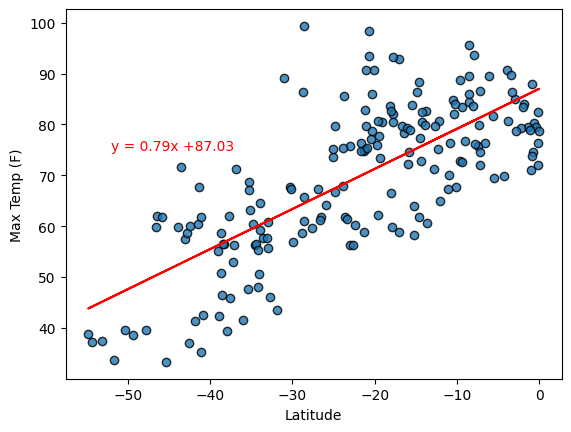

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))
plt.show()

**Discussion about the linear relationship:** There is a correlation between latitude and max temperatures for both hemispheres. The further away from the equator, the temperatures drop linearly. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04297565581356772


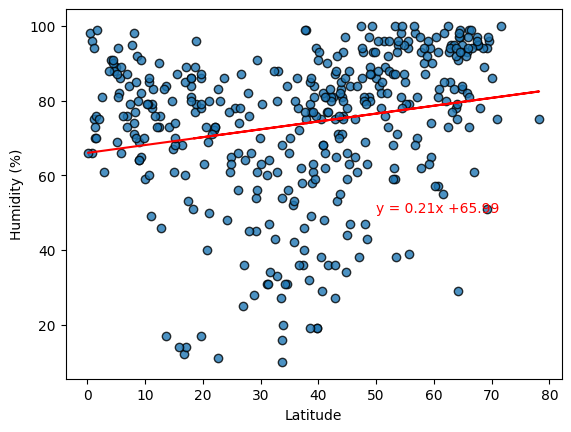

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.show()

The r-squared is: 0.0072129756630457675


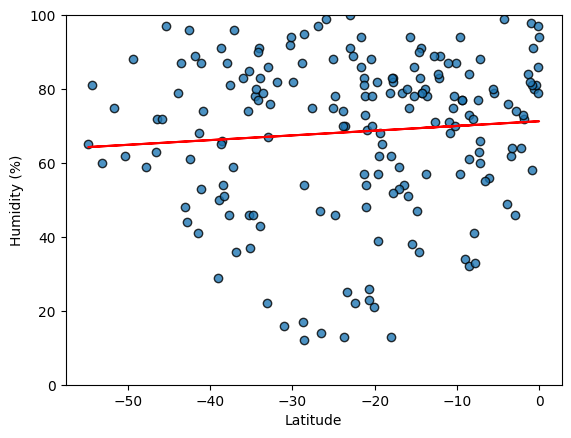

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and humidity for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.012653730238699932


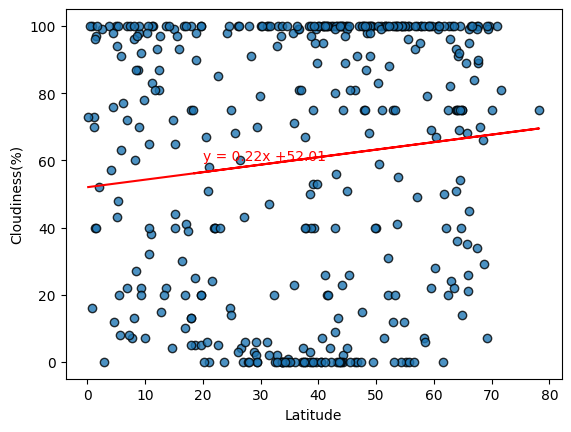

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(20, 60))
plt.show()

The r-squared is: 0.0006066657448724273


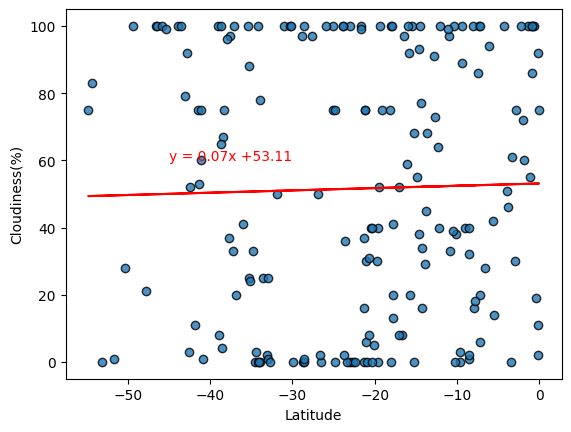

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.012898174777176507


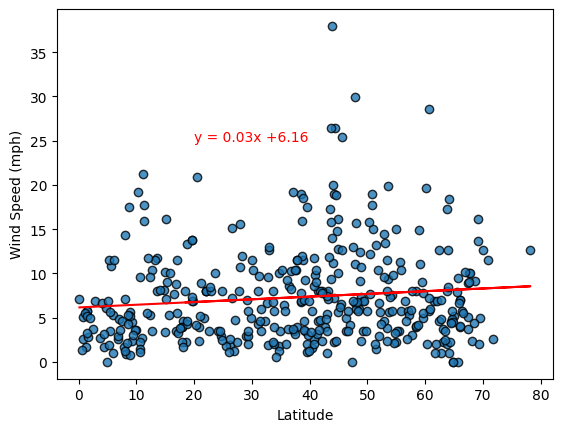

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.show()

The r-squared is: 0.05195142456248378


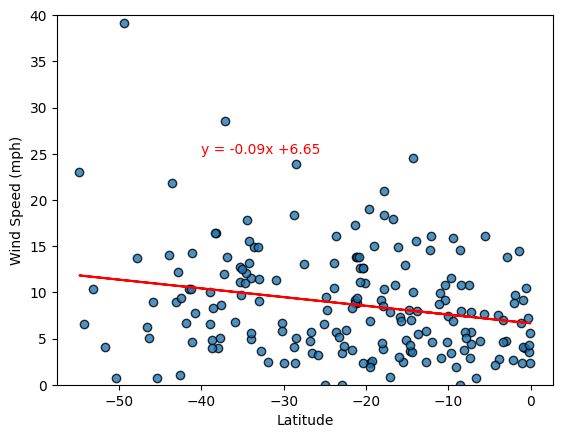

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and windspeed for both hemispheres. 